# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make Dataset

In [2]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)], dtype= np.float)
y_seeds = np.array([0,1,1,0])

N = 1000
# 0~3의 정수를 무작위로 1000개 고릅니다.
idxs = np.random.randint(0, 4, N)

X = x_seeds[idxs]
Y = y_seeds[idxs]

# X에 Gaussian noise를 추가합니다.
X += np.random.normal(scale = 0.25, size = X.shape)

# Data Plotting

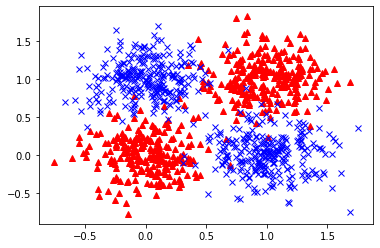

In [3]:
idxs_1 = np.where(Y == 1)
idxs_0 = np.where(Y == 0)

X_0 = X[idxs_0]
Y_0 = Y[idxs_0]
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

plt.plot(X_0[:,0], X_0[:,1], 'r^')
plt.plot(X_1[:,0], X_1[:,1], 'bx')
plt.show()

# Define Model

In [4]:
class Net():
    def __init__(self, input_num, hidden_num):
        self.input_num = input_num
        self.hidden_num = hidden_num
        
        self.W1 = np.random.normal(size=(hidden_num, input_num))
        self.b1 = np.random.normal(size=hidden_num)
        self.W2 = np.random.normal(size=hidden_num)
        self.b2 = np.random.normal(1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        # forward
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

# Load Model

In [5]:
# 2차원의 input과 3개의 hidden node를 갖는 모델을 선언합니다.
model = Net(2, 3)

# Train

In [6]:
def train(X, Y, model, lr = 1e-1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = X.shape[0]
    cost = 0.
    
    for x,y in zip(X,Y):
        # forward
        a2, (z1, a1, z2, _) = model.predict(x)
        
        # loss
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
        
        # backward
        diff = a2 - y
        db2 += diff
        dW2 += (a1*diff)
        db1 += (1-a1**2)*model.W2*diff
        dW1 += np.outer( ((1 - a1 ** 2)*model.W2*diff).reshape(-1,1), x.reshape(1,-1))
        
    # update weight and bias
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b1 -= lr * db1/m
    
    return cost

In [7]:
# train
costs = []
epochs = 501
print("epoch     cost")
print("="*15)
for epoch in range(epochs):
    cost = train(X,Y, model, 1.0)
    costs.append(cost)
    if epoch % 100 == 0:
        print("{:<5d}    {:.4f}".format(epoch, cost))

epoch     cost
0        0.7228
100      0.2129
200      0.1660
300      0.1547
400      0.1507
500      0.1487


# Loss Graph

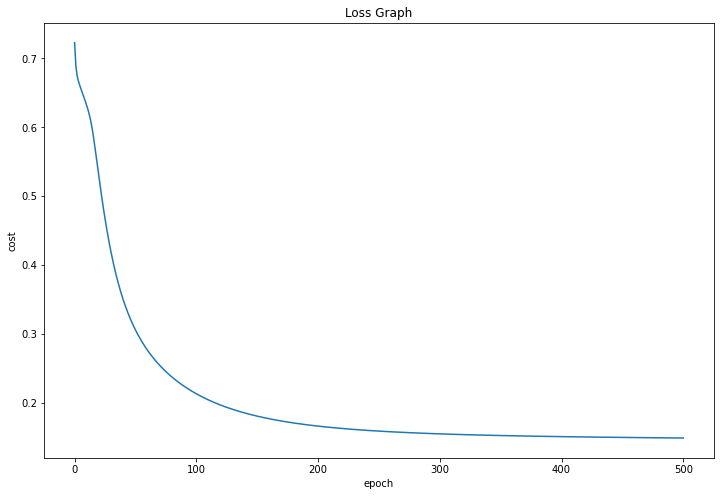

In [8]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs), costs)
plt.xlabel("epoch")
plt.ylabel('cost')
plt.title("Loss Graph")
plt.show()

# Test

In [9]:
def test(input):
    print(" data   predict")
    for x in input:
        print("{}   {:.4f}".format(x, model.predict(x)[0]))
    print("\n")

In [10]:
input = np.array([[0,0],[0,1],[1,0],[1,1]])
test(input)

 data   predict
[0 0]   0.0317
[0 1]   0.9951
[1 0]   0.9956
[1 1]   0.0028




- [0 1] [1 0]에서 1, [0 0] [1 1]에서 0으로 수렴하는 것으로 보아 학습이 적절하게 이루어졌음을 확인하였습니다.